In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\asifs\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#loading the dataset
df = pd.read_excel(r"C:\Users\asifs\Desktop\DS Projects\Bird Strikes Data\bird_strikes_data_transformed.xlsx")
df.head()

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,...,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Flight Year
0,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,2,...,False,Medium,No Cloud,Unknown bird - medium,No,30736,1500,0,Yes,2000
1,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,2,...,False,Small,Some Cloud,Rock pigeon,Yes,0,0,0,No,2001
2,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,2,...,False,Small,No Cloud,European starling,No,0,50,0,No,2001
3,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,2,...,False,Small,Some Cloud,European starling,Yes,0,50,0,Yes,2002
4,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,2,...,False,Small,No Cloud,European starling,No,0,50,0,No,2003


In [3]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24721 entries, 0 to 24720
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Aircraft: Type                           24721 non-null  object        
 1   Airport: Name                            24721 non-null  object        
 2   Altitude bin                             24721 non-null  object        
 3   Aircraft: Make/Model                     24721 non-null  object        
 4   Wildlife: Number struck                  24721 non-null  object        
 5   Wildlife: Number Struck Actual           24721 non-null  int64         
 6   Effect: Impact to flight                 24721 non-null  object        
 7   FlightDate                               24721 non-null  datetime64[ns]
 8   Effect: Indicated Damage                 24721 non-null  object        
 9   Aircraft: Number of engines?           

In [4]:
#converting all the attributes to numerical format
df_numerical = df
for col_name in df_numerical.columns:
    if df_numerical[col_name].dtype == 'object':
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes
df_numerical

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,...,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Flight Year
0,0,467,1,28,3,859,1,2000-11-23,0,1,...,False,1,0,291,0,30736,1500,0,1,2000
1,0,188,0,218,3,424,2,2001-07-25,0,1,...,False,2,2,247,1,0,0,0,0,2001
2,0,474,0,106,3,261,2,2001-09-14,1,1,...,False,2,0,109,0,0,50,0,0,2001
3,0,805,0,28,3,806,4,2002-09-05,1,1,...,False,2,2,109,1,0,50,0,1,2002
4,0,633,0,124,3,942,2,2003-06-23,1,1,...,False,2,0,109,0,0,50,0,0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24716,0,776,0,30,0,1,2,2011-12-29,1,1,...,True,1,0,175,1,0,10,0,1,2011
24717,0,742,1,164,0,1,2,2011-12-30,1,1,...,False,0,1,290,0,0,1500,0,0,2011
24718,0,666,0,5,0,1,2,2011-12-30,1,1,...,False,2,2,286,1,0,0,0,0,2011
24719,0,214,0,39,0,1,2,2011-12-31,1,1,...,False,1,2,291,1,0,0,0,1,2011


In [5]:
#removing unnecessary columns
df_numerical = df_numerical.drop('Aircraft: Type', axis = 1)

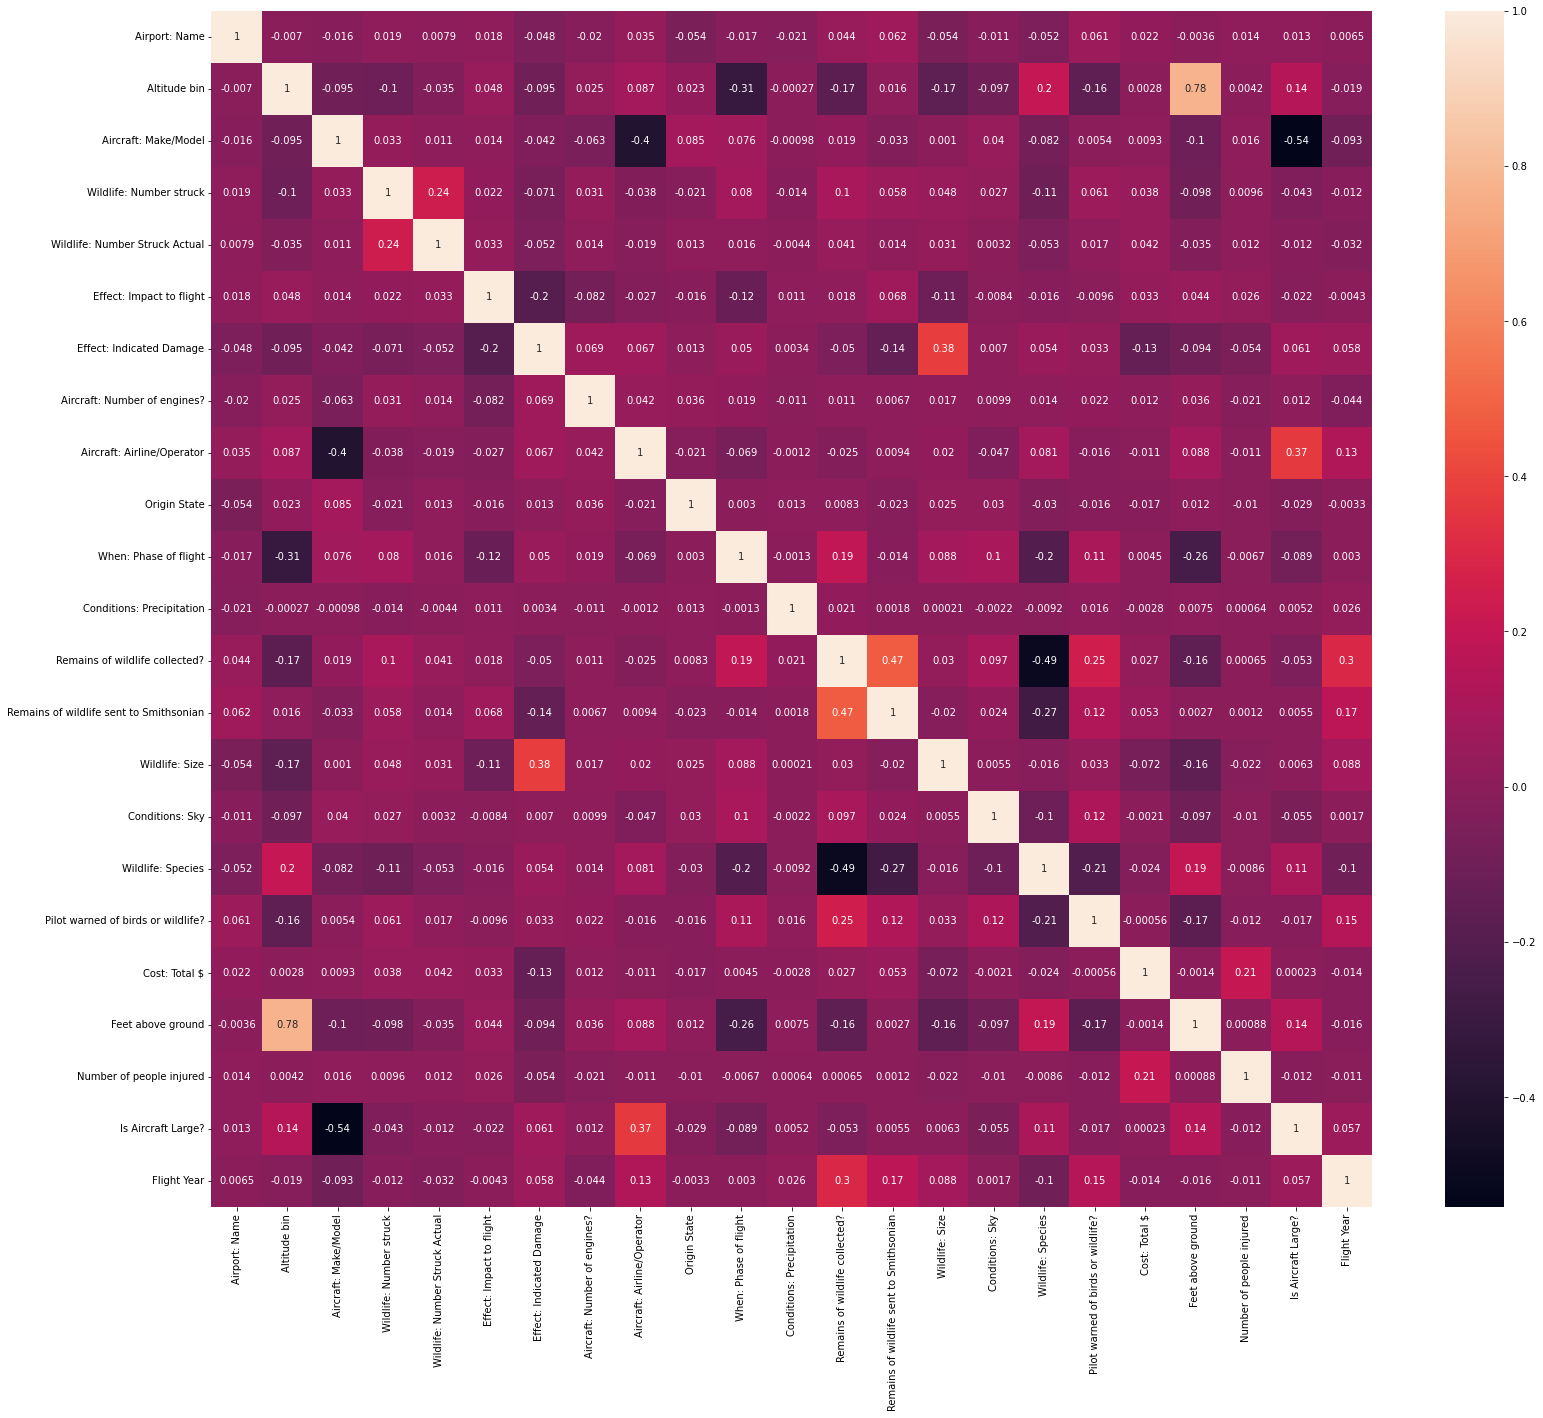

In [6]:
#viewing the correlation matrix in heatmap form
correlation_matrix = df_numerical.corr()
plt.figure(figsize = (26, 22))
sns.heatmap(correlation_matrix, annot = True)
plt.show()